In [2]:
# Jack Import Incremental COVID Cases per 100,000
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

inc_cases_per_100000 = "Data/New_cases_per_100000.csv"

inc_cases_per_100000_df = pd.read_csv(inc_cases_per_100000, encoding="ISO-8859-1") 

inc_cases_per_100000_df.head()

,ï»¿Month,Alaska,Arkansas,Colorado,Connecticut,Delaware,Florida,Illinois,Kansas,Kentucky,Louisiana,Massachusetts,Missouri,North Dakota,Tennessee,Texas,Utah,Virginia,Wisconsin
0,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-01,3.6,4.2,10.4,13.2,6.3,5.1,8.4,2.5,2.4,20.3,16.1,3.4,3.3,6.1,2.0,5.5,2.9,4.9
2,2020-04-01,34.1,54.5,141.9,423.2,229.6,96.4,202.7,60.2,53.1,428.3,457.1,75.1,61.5,86.1,52.6,81.5,89.3,63.1
3,2020-05-01,16.2,101.9,217.7,580.7,533.9,107.1,506.1,199.4,110.9,287.6,735.5,95.1,179.7,163.7,104.5,138.4,266.2,144.7
4,2020-06-01,38.9,283.6,143.3,243.7,306.6,191.8,338.6,138.7,120.6,291.3,321.9,99.5,162.9,213.6,185.5,262.3,290.5,217.8


In [3]:
#Clean Columns

list(inc_cases_per_100000_df.columns.values)

['ï»¿Month',
 'Alaska',
 'Arkansas',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Illinois',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Massachusetts',
 'Missouri',
 'North Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Wisconsin']

In [4]:
#Clean Columns

inc_cases_per_100000_df = inc_cases_per_100000_df.rename(columns={"ï»¿Month": "Month"})
inc_cases_per_100000_df.sample(10)

,Month,Alaska,Arkansas,Colorado,Connecticut,Delaware,Florida,Illinois,Kansas,Kentucky,Louisiana,Massachusetts,Missouri,North Dakota,Tennessee,Texas,Utah,Virginia,Wisconsin
1,2020-03-01,3.6,4.2,10.4,13.2,6.3,5.1,8.4,2.5,2.4,20.3,16.1,3.4,3.3,6.1,2.0,5.5,2.9,4.9
2,2020-04-01,34.1,54.5,141.9,423.2,229.6,96.4,202.7,60.2,53.1,428.3,457.1,75.1,61.5,86.1,52.6,81.5,89.3,63.1
11,2021-01-01,850.6,1326.1,818.6,996.1,1204.1,888.8,887.0,1254.1,1010.5,928.9,1121.4,796.5,653.5,1777.8,918.5,1340.6,808.5,860.3
7,2020-09-01,309.6,653.8,180.6,109.4,291.4,489.1,471.2,558.3,432.9,493.9,152.3,634.7,1037.4,643.4,509.5,447.3,344.7,535.6
0,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2020-10-01,605.3,833.5,379.5,230.6,381.7,367.8,607.2,688.1,619.2,394.0,240.0,768.7,1983.9,735.7,487.1,969.4,334.8,1313.9
3,2020-05-01,16.2,101.9,217.7,580.7,533.9,107.1,506.1,199.4,110.9,287.6,735.5,95.1,179.7,163.7,104.5,138.4,266.2,144.7
6,2020-08-01,331.5,707.1,237.3,92.1,304.4,1150.7,377.8,460.0,390.3,1063.2,151.9,567.8,535.9,872.8,814.2,460.6,364.7,448.1
5,2020-07-01,152.4,595.3,166.5,81.5,292.8,1044.6,209.5,323.9,202.9,841.4,106.9,255.7,234.4,596.7,670.0,523.6,241.7,320.0
4,2020-06-01,38.9,283.6,143.3,243.7,306.6,191.8,338.6,138.7,120.6,291.3,321.9,99.5,162.9,213.6,185.5,262.3,290.5,217.8


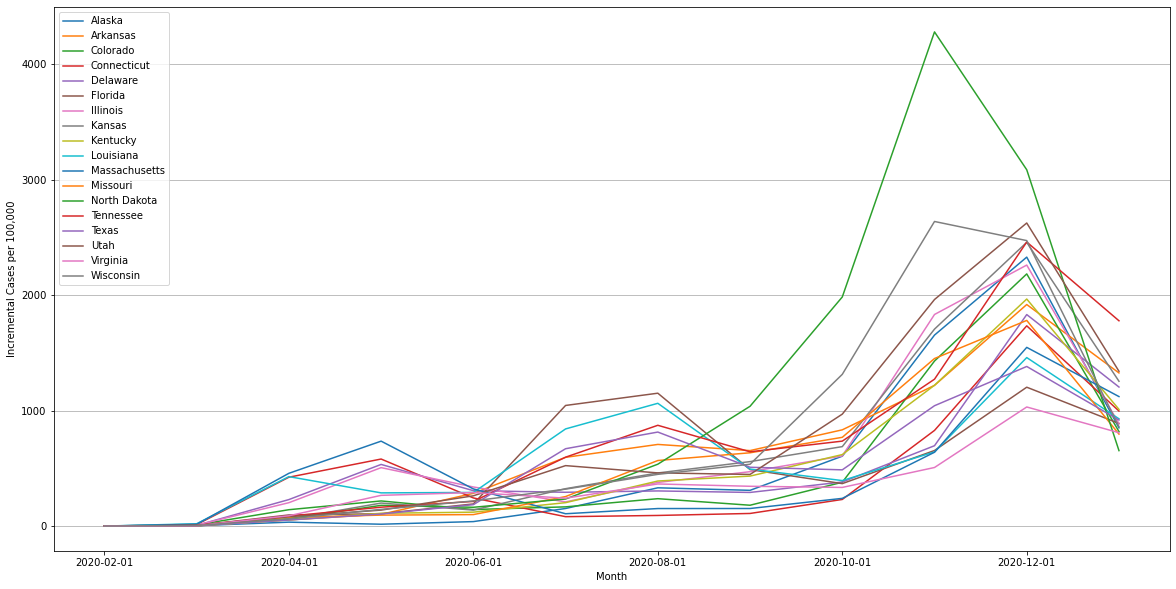

In [5]:
#Graph All

lines_inc = inc_cases_per_100000_df.plot.line(x = "Month", figsize =(20,10))
lines_inc.set_ylabel("Incremental Cases per 100,000")
lines_inc.grid('off', which='major', axis='y' )



In [6]:
# Jack Import Governor Data
import pandas as pd 

gov_data = "Data/governor_political_party.csv"

gov_data_df = pd.read_csv(gov_data, encoding="ISO-8859-1") 

gov_data_df

,ï»¿State,Political Party
0,Alaska,Republican
1,Arkansas,Republican
2,Colorado,Democrat
3,Connecticut,Democrat
4,Delaware,Democrat
5,Florida,Republican
6,Illinois,Republican
7,Kansas,Democrat
8,Kentucky,Democrat
9,Louisiana,Democrat


In [7]:
#Clean Columns
gov_data_df = gov_data_df.rename(columns={"ï»¿State": "State"})

gov_data_df.sample(5)

,State,Political Party
4,Delaware,Democrat
17,Virginia,Democrat
5,Florida,Republican
15,Texas,Republican
8,Kentucky,Democrat


['Colorado', 'Connecticut', 'Delaware', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Oregon', 'Virginia', 'Wisconsin']


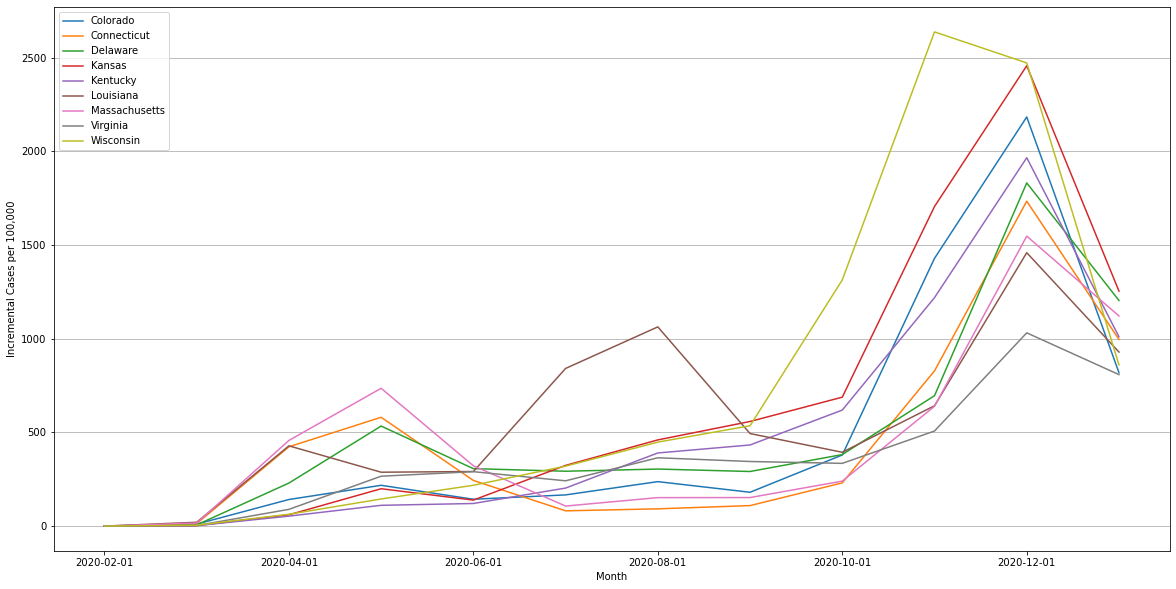

In [8]:
#Graph Democratic Curves
dem_df = gov_data_df.loc[gov_data_df['Political Party'] == 'Democrat']
dem_df
dem_states = dem_df['State'].tolist()
print(dem_states)


dem_data_df = inc_cases_per_100000_df[['Month', 'Colorado', 'Connecticut', 'Delaware', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Virginia', 'Wisconsin']]
dem_data_df

dem_lines_inc = dem_data_df.plot.line(x = "Month", figsize =(20,10))
dem_lines_inc.set_ylabel("Incremental Cases per 100,000")
dem_lines_inc.grid('off', which='major', axis='y' )

['Alaska', 'Arkansas', 'Florida', 'Illinois', 'Missouri', 'North Dakota', 'Tennessee', 'Texas', 'Utah']


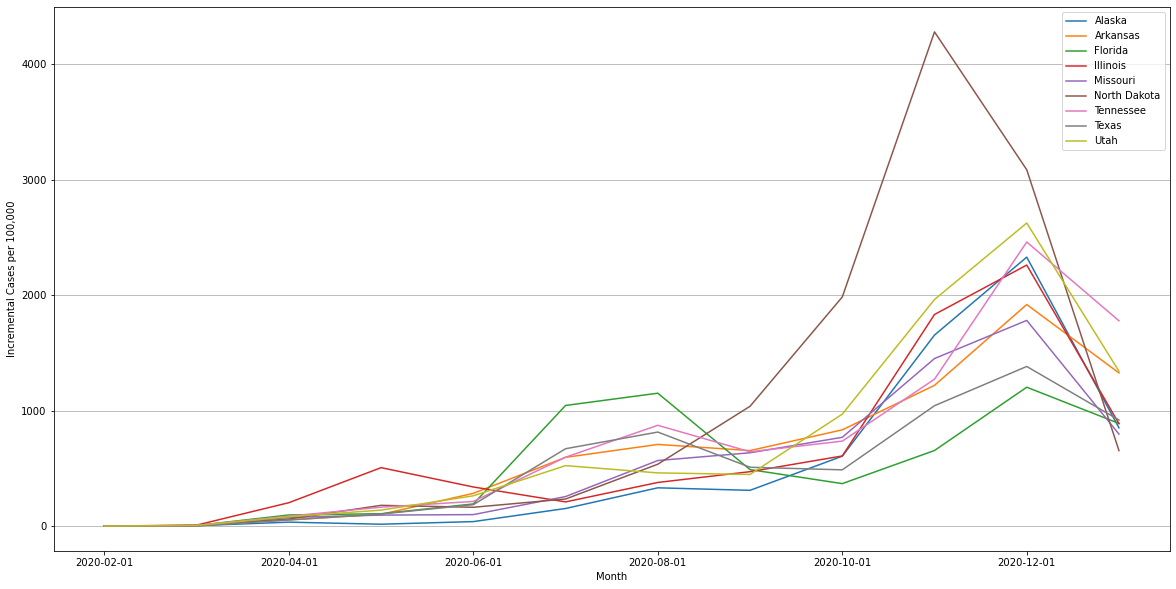

In [9]:
#Graph Democratic Curves
repub_df = gov_data_df.loc[gov_data_df['Political Party'] == 'Republican']
repub_df
repub_states = repub_df['State'].tolist()
print(repub_states)

repub_data_df = inc_cases_per_100000_df[['Month', 'Alaska', 'Arkansas', 'Florida', 'Illinois', 'Missouri', 'North Dakota', 'Tennessee', 'Texas', 'Utah']]

repub_data_df

repub_lines_inc = repub_data_df.plot.line(x = "Month", figsize =(20,10))
repub_lines_inc.set_ylabel("Incremental Cases per 100,000")
repub_lines_inc.grid('off', which='major', axis='y' )



<ipython-input-10-a2ddb1db33c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repub_data_df['Average'] = repub_data_df.mean(numeric_only=True, axis=1)
<ipython-input-10-a2ddb1db33c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem_data_df['Average'] = dem_data_df.mean(numeric_only=True, axis=1)


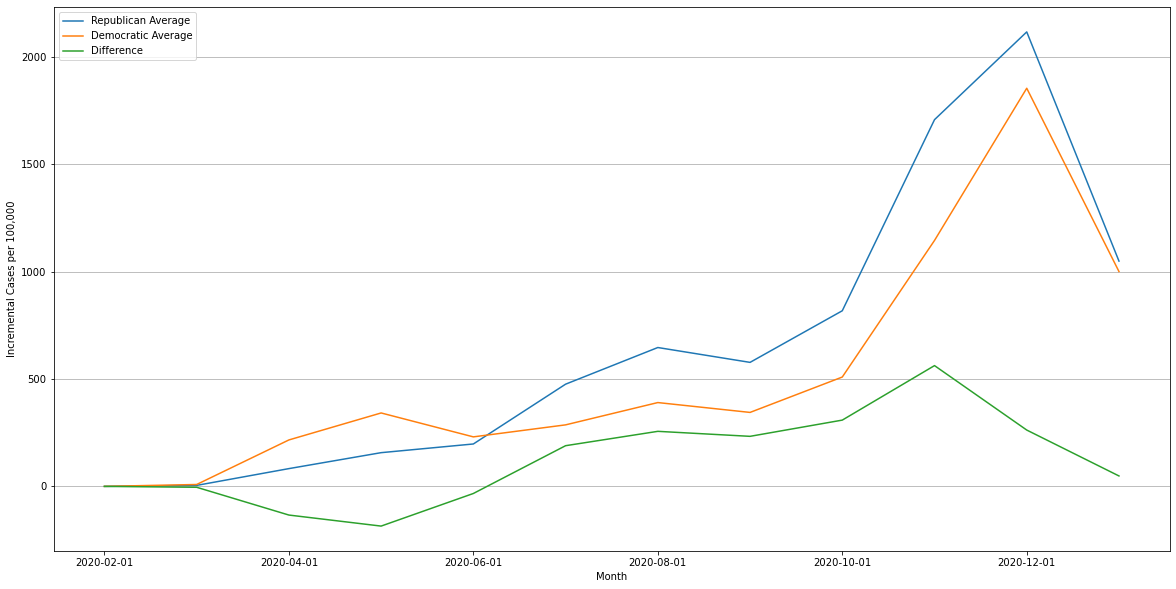

In [10]:

repub_data_df['Average'] = repub_data_df.mean(numeric_only=True, axis=1)


dem_data_df['Average'] = dem_data_df.mean(numeric_only=True, axis=1)

month_list = repub_data_df['Month'].tolist()
repub_avg = repub_data_df['Average'].tolist()
dem_avg = dem_data_df['Average'].tolist()



avgs_df = pd.DataFrame(list(zip(month_list, repub_avg, dem_avg)), 
               columns =['Month', 'Republican Average', 'Democratic Average'])
avgs_df
avgs_df['Difference'] = avgs_df['Republican Average'] - avgs_df['Democratic Average']

avgs_graph = avgs_df.plot.line(x = "Month", figsize =(20,10),)
avgs_graph.set_ylabel("Incremental Cases per 100,000")

avgs_graph.grid('off', which='major', axis='y' )



In [11]:
#File to load
file_path = "../Shadee/Data/alcsales_August2020_codedfullfile.csv"

# Read Purchasing File and store into Pandas data frame
alcohol_sales_data = pd.read_csv(file_path)
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])
alcohol_sales_data.head()


,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01


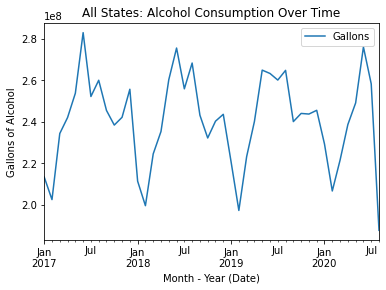

In [81]:
month_date_alcohol_sales_groupby = alcohol_sales_data.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Plot
cleaned_month_date_alcohol_sales_groupby_df.plot.line( y='Gallons', title="All States: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

plt.savefig("allstates_alcohol_consumption.png")




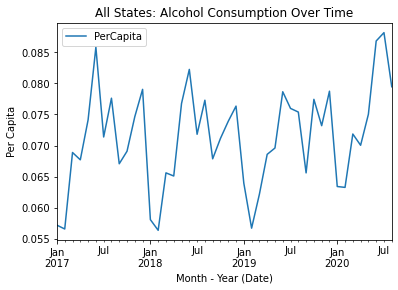

In [88]:
dem_data_consumption_df = alcohol_sales_data.loc[alcohol_sales_data["State"].isin(['Colorado', 'Connecticut', 'Delaware', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Virginia', 'Wisconsin'])]


month_date_alcohol_sales_groupby = dem_data_consumption_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

dem_cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Plot
dem_cleaned_month_date_alcohol_sales_groupby_df.plot.line( y='PerCapita', title="All States: Alcohol Consumption Over Time")
plt.ylabel('Per Capita')

# plt.savefig("allstates_alcohol_consumption.png")



Text(0, 0.5, 'Per Capita')

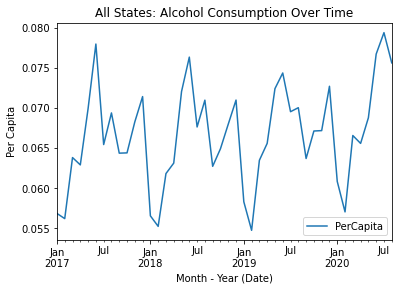

In [89]:
repub_data_consumption_df = alcohol_sales_data.loc[alcohol_sales_data["State"].isin(['Alaska', 'Arkansas', 'Florida', 'Illinois', 'Missouri', 'North Dakota', 'Tennessee', 'Texas', 'Utah'])]


month_date_alcohol_sales_groupby = repub_data_consumption_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

repub_cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Plot
repub_cleaned_month_date_alcohol_sales_groupby_df.plot.line( y='PerCapita', title="All States: Alcohol Consumption Over Time")
plt.ylabel('Per Capita')

# plt.savefig("allstates_alcohol_consumption.png")

Text(0, 0.5, 'Per Capita')

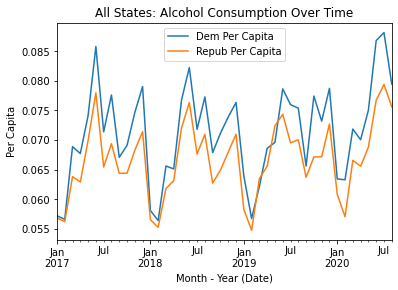

In [98]:
combined_df = dem_cleaned_month_date_alcohol_sales_groupby_df

combined_df["repub per capita"] = repub_cleaned_month_date_alcohol_sales_groupby_df['PerCapita']
combined_df = combined_df.drop('Gallons', 1)
combined_df = combined_df.drop('Ethanol', 1)
combined_df = combined_df.drop('Population', 1)
combined_df = combined_df.rename(columns={'PerCapita': 'Dem Per Capita', 'repub per capita': 'Repub Per Capita'})

combined_df.plot.line(title="All States: Alcohol Consumption Over Time")
plt.ylabel('Per Capita')